# LSTM Stock Predictor Using Closing Prices

In this notebook, we will build and train a custom LSTM RNN that uses a 10 day window of chosen stock closing prices to predict the 11th day closing price. 

We will need to:

1. Prepare the data for training and testing
2. Build and train a custom LSTM RNN
3. Evaluate the performance of the model

## Data Preparation

In this section, we will need to prepare the training and testing data for the model. The model will use a rolling 10 day window to predict the 11th day closing price.

We will need to:
1. Use the `window_data` function to generate the X and y values for the model.
2. Split the data into 70% training and 30% testing
3. Apply the MinMaxScaler to the X and y values
4. Reshape the X_train and X_test data for the model. Note: The required input format for the LSTM is:

```python
reshape((X_train.shape[0], X_train.shape[1], 1))
```

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/draganbogatic/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Set the random seed for reproducibility
# Note: It is a good practice to run multiple experiments to evaluate model
#from numpy.random import seed
#seed(1)
#from tensorflow import random
#random.set_seed(2)

In [7]:
# Load the historical closing prices for the stock
stock_df = pd.read_csv("../Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
stock_df = stock_df.sort_index()

stock_df.tail()

,Adj Close
Date,
2021-07-13,279.209991
2021-07-14,278.309998
2021-07-15,279.720001
2021-07-16,277.899994
2021-07-19,272.660004


In [8]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [9]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the `close` column
feature_column = 0
target_column = 0
X, y = window_data(stock_df, window_size, feature_column, target_column)

print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[143.55000305 143.41999817 142.80000305 141.6000061  141.94999695
  142.57000732 142.32000732 141.36000061 140.47000122 138.38999939]
 [143.41999817 142.80000305 141.6000061  141.94999695 142.57000732
  142.32000732 141.36000061 140.47000122 138.38999939 134.22000122]
 [142.80000305 141.6000061  141.94999695 142.57000732 142.32000732
  141.36000061 140.47000122 138.38999939 134.22000122 129.57000732]
 [141.6000061  141.94999695 142.57000732 142.32000732 141.36000061
  140.47000122 138.38999939 134.22000122 129.57000732 127.73999786]
 [141.94999695 142.57000732 142.32000732 141.36000061 140.47000122
  138.38999939 134.22000122 129.57000732 127.73999786 132.61000061]] 

y sample values:
[[134.22000122]
 [129.57000732]
 [127.73999786]
 [132.61000061]
 [136.22999573]]


In [10]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [18]:
# Reshape the features for the model
X_train = X_train_scaler.reshape((X_train_scaler.shape[0], X_train_scaler.shape[1], 1))
X_test = X_test_scaler.reshape((X_test_scaler.shape[0], X_test_scaler.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.11532755]
  [0.11455551]
  [0.11087361]
  [0.10374731]
  [0.10582576]
  [0.10950776]
  [0.10802311]
  [0.10232202]
  [0.09703667]
  [0.08468438]]

 [[0.11455551]
  [0.11087361]
  [0.10374731]
  [0.10582576]
  [0.10950776]
  [0.10802311]
  [0.10232202]
  [0.09703667]
  [0.08468438]
  [0.05992045]]

 [[0.11087361]
  [0.10374731]
  [0.10582576]
  [0.10950776]
  [0.10802311]
  [0.10232202]
  [0.09703667]
  [0.08468438]
  [0.05992045]
  [0.03230602]]

 [[0.10374731]
  [0.10582576]
  [0.10950776]
  [0.10802311]
  [0.10232202]
  [0.09703667]
  [0.08468438]
  [0.05992045]
  [0.03230602]
  [0.02143833]]

 [[0.10582576]
  [0.10950776]
  [0.10802311]
  [0.10232202]
  [0.09703667]
  [0.08468438]
  [0.05992045]
  [0.03230602]
  [0.02143833]
  [0.05035931]]] 

X_test sample values:
[[[0.49872325]
  [0.49153751]
  [0.49480375]
  [0.49818879]
  [0.49040925]
  [0.46897092]
  [0.48013541]
  [0.4985451 ]
  [0.4935567 ]
  [0.47485007]]

 [[0.49153751]
  [0.49480375]
  [0.498188

---

## Build and Train the LSTM RNN

In this section, we will design a custom LSTM RNN and fit (train) it using the training data.

Need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [19]:
# Build the LSTM model. 
# The return sequences need to be set to True if we are adding additional LSTM layers, but 
# We don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [20]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [21]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 30)            3840      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [34]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended

model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=3, verbose=1)

Epoch 1/10
347/347 [==============================] - 3s 7ms/step - loss: 0.0025
Epoch 2/10
347/347 [==============================] - 3s 7ms/step - loss: 0.0021
Epoch 3/10
347/347 [==============================] - 3s 8ms/step - loss: 0.0021
Epoch 4/10
347/347 [==============================] - 3s 8ms/step - loss: 0.0020
Epoch 5/10
347/347 [==============================] - 3s 7ms/step - loss: 0.0018
Epoch 6/10
347/347 [==============================] - 3s 7ms/step - loss: 0.0020
Epoch 7/10
347/347 [==============================] - 2s 7ms/step - loss: 0.0016
Epoch 8/10
347/347 [==============================] - 3s 7ms/step - loss: 0.0018
Epoch 9/10
347/347 [==============================] - 3s 7ms/step - loss: 0.0015
Epoch 10/10
347/347 [==============================] - 3s 7ms/step - loss: 0.0016


---

## Model Performance

In this section, we will evaluate the model using the test data. 

Need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [35]:
# Evaluate the model
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.0424


0.04244405776262283

In [36]:
# Make predictions
predicted = model.predict(X_test)

In [37]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [38]:
# Create a DataFrame of Real and Predicted values
stock = pd.DataFrame({"Real": real_prices.ravel(),"Predicted": predicted_prices.ravel()}, index = stock_df.index[-len(real_prices): ]) 
stock.iloc[-20:]

,Real,Predicted
Date,,
2021-06-21,274.040009,207.084244
2021-06-22,277.100006,207.092178
2021-06-23,276.920013,207.085373
2021-06-24,274.660004,207.081207
2021-06-25,275.489990,207.084045
2021-06-28,278.380005,207.083542
2021-06-29,276.609985,207.078964
2021-06-30,276.209991,207.081207
2021-07-01,277.920013,207.083984


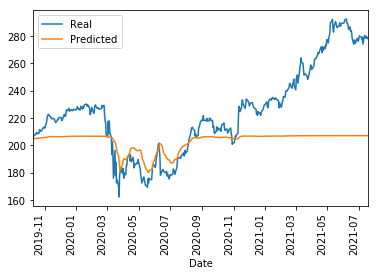

In [39]:
# Plot the real vs predicted values as a line chart
stock.plot(rot=90)

In [20]:
# In this case LSTM model is not reliable predictor of future stock prices aside from the period from 04/20-09/20 which was the time when coronavirus pandemic started. We need to tweak hyperparameters and length of history and compare the results, to see if we can improve the model without overfitting.